In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Oversampling of Data

In [ ]:
# Install the required libraries if you haven't already
# pip install imbalanced-learn scikit-learn pandas

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv("/content/DiseaseData - Sheet1.csv")

# Separate features and target variable
X = data.drop(['id', 'prognosis'], axis=1)  # Dropping 'id' and 'prognosis' columns
y = data['prognosis']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Decode the resampled target back to its original form
y_resampled_decoded = label_encoder.inverse_transform(y_resampled)

# Combine the resampled data into a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data = pd.concat([X_resampled_df, pd.Series(y_resampled_decoded, name='prognosis')], axis=1)

# Save the resampled dataset
resampled_data.to_csv('DiseaseData_Resampled.csv', index=False)

print("Resampled dataset saved successfully as 'DiseaseData_Resampled.csv'.")

Resampled dataset saved successfully as 'DiseaseData_Resampled.csv'.


Pie Chart Distribution of unsampled data

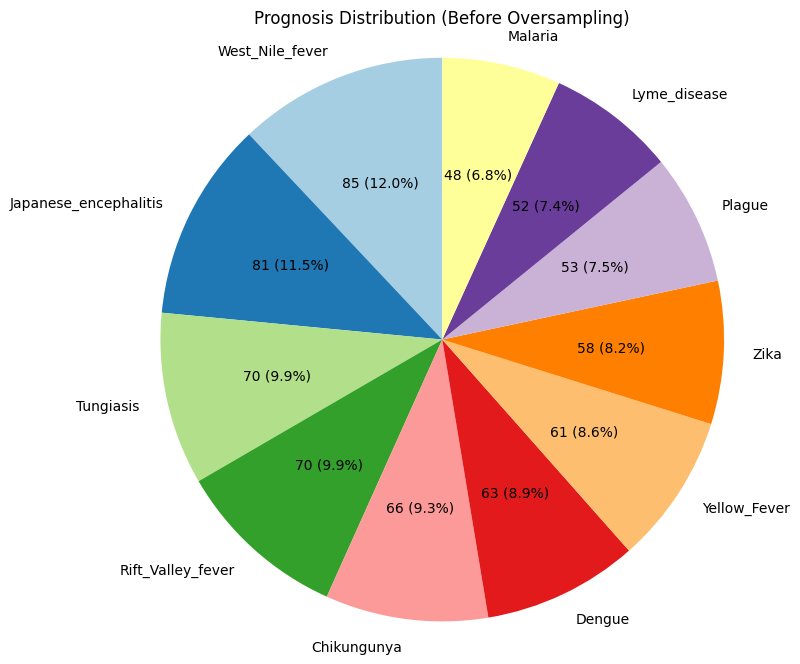

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/DiseaseData - Sheet1.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Get the distribution of the 'prognosis' column
prognosis_counts = data['prognosis'].value_counts()

# Function to format labels with absolute numbers and percentages
def format_label(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(prognosis_counts, labels=[f"{i}" for i in prognosis_counts.index],
        autopct=lambda pct: format_label(pct, prognosis_counts), startangle=90, colors=plt.cm.Paired.colors)
plt.title('Prognosis Distribution (Before Oversampling)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Correlation Matrix of unsampled data

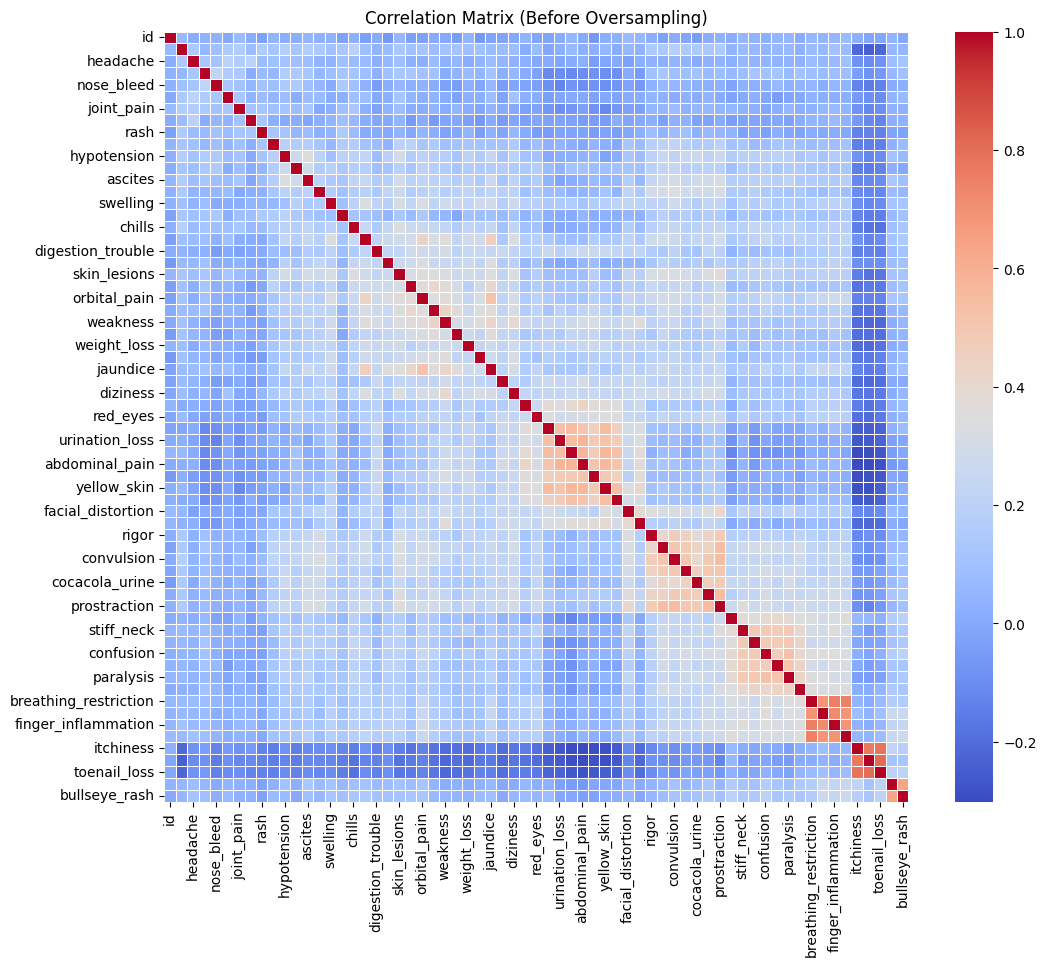

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/ML_Project/DiseaseData - Sheet1.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Before Oversampling)')
plt.show()


PCA plot of unsampled Data

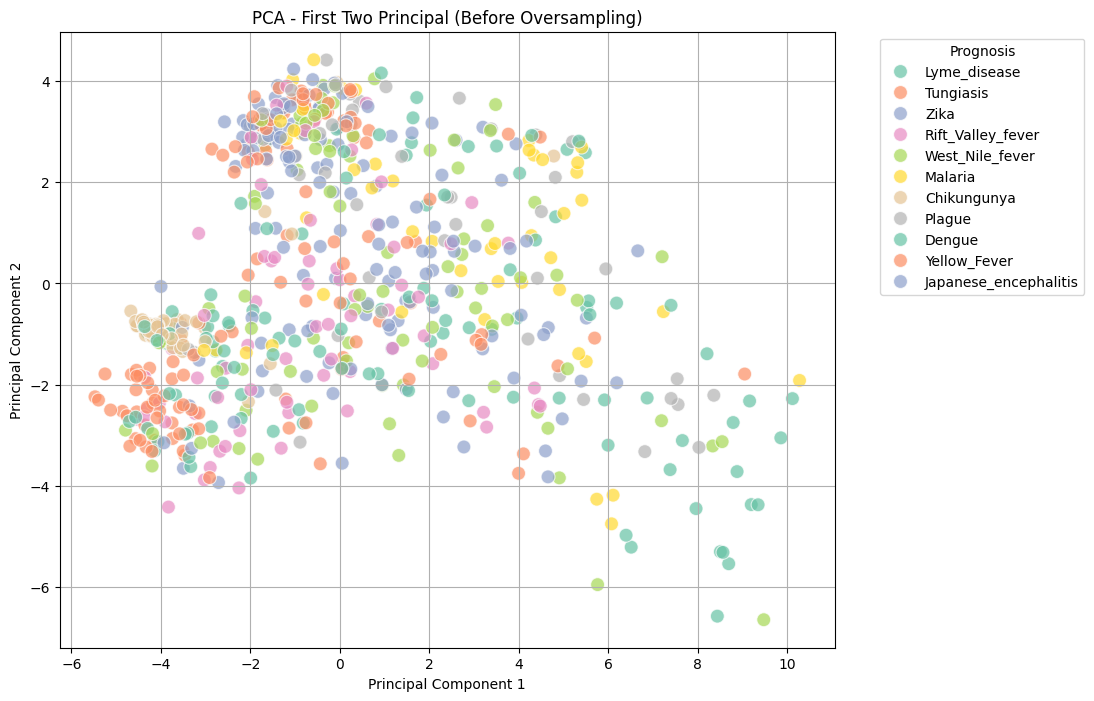

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the data
file_path = '/content/DiseaseData - Sheet1.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Select only numeric columns for PCA
numeric_columns = data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(scaled_data)

# Add the prognosis to the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['prognosis'] = data['prognosis']  # Assuming 'prognosis' is the column with categories

# Plot the PCA result with different colors for each prognosis
plt.figure(figsize=(10, 8))

# Use seaborn to create a scatter plot with hue based on prognosis
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='prognosis', palette='Set2', s=100, alpha=0.7)

# Add title and labels
plt.title('PCA - First Two Principal (Before Oversampling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Prognosis', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


Pie chart distribution of oversampled data

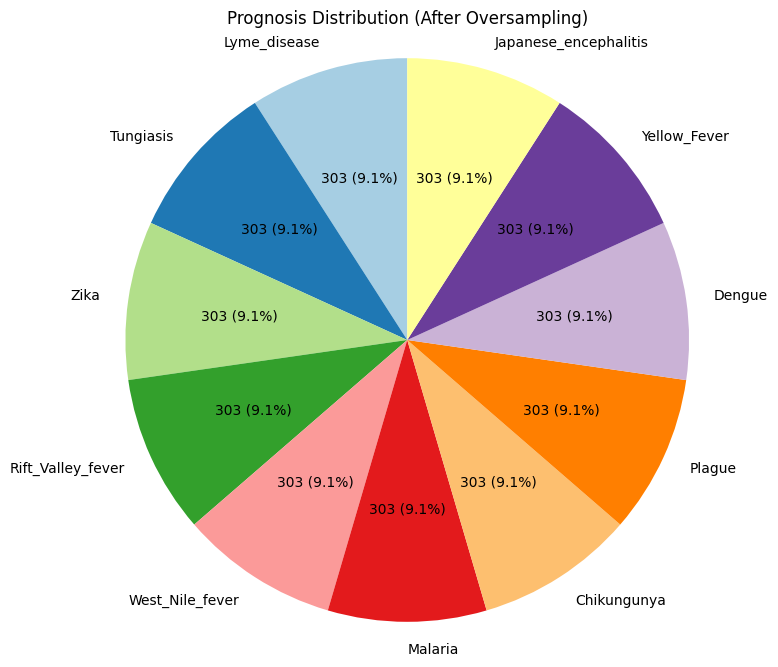

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Get the distribution of the 'prognosis' column
prognosis_counts = data['prognosis'].value_counts()

# Function to format labels with absolute numbers and percentages
def format_label(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return f"{absolute} ({pct:.1f}%)"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(prognosis_counts, labels=[f"{i}" for i in prognosis_counts.index],
        autopct=lambda pct: format_label(pct, prognosis_counts), startangle=90, colors=plt.cm.Paired.colors)
plt.title('Prognosis Distribution (After Oversampling)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


Correlation matrix of oversampled data

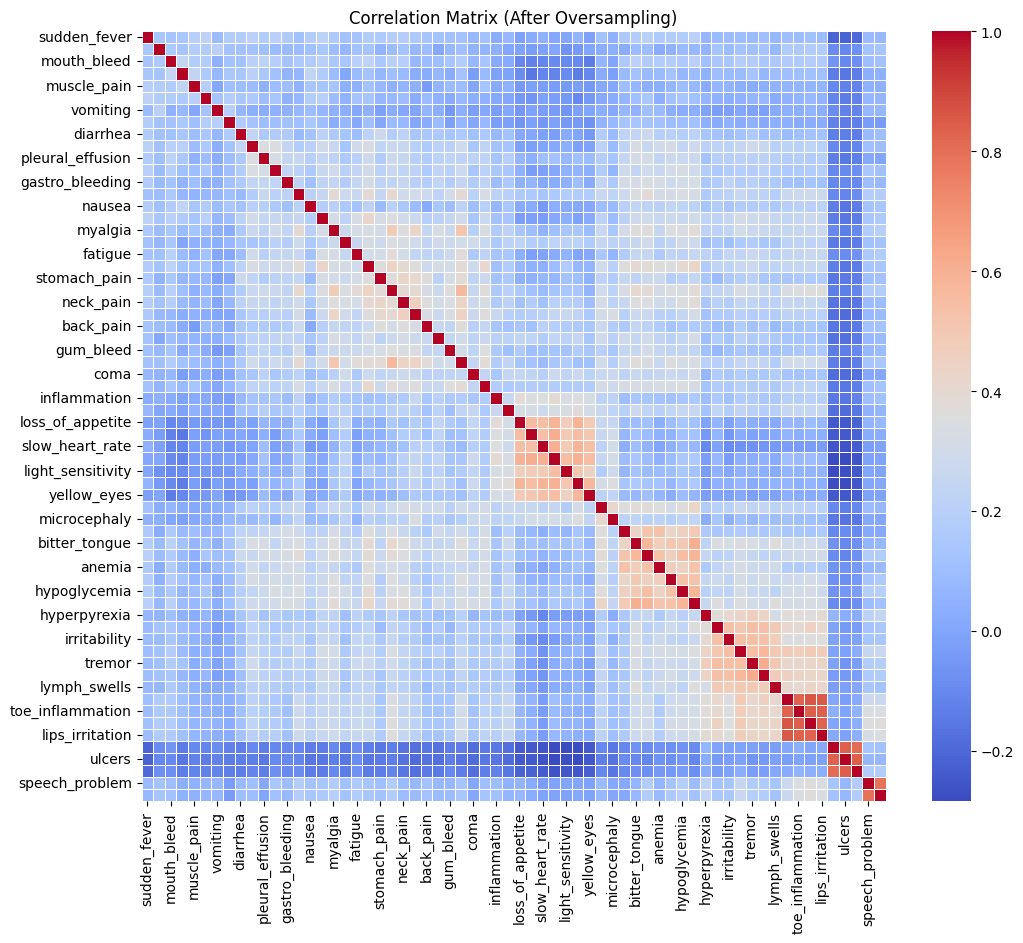

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Select only numeric columns for correlation
numeric_columns = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (After Oversampling)')
plt.show()


PCA plot for oversampled data

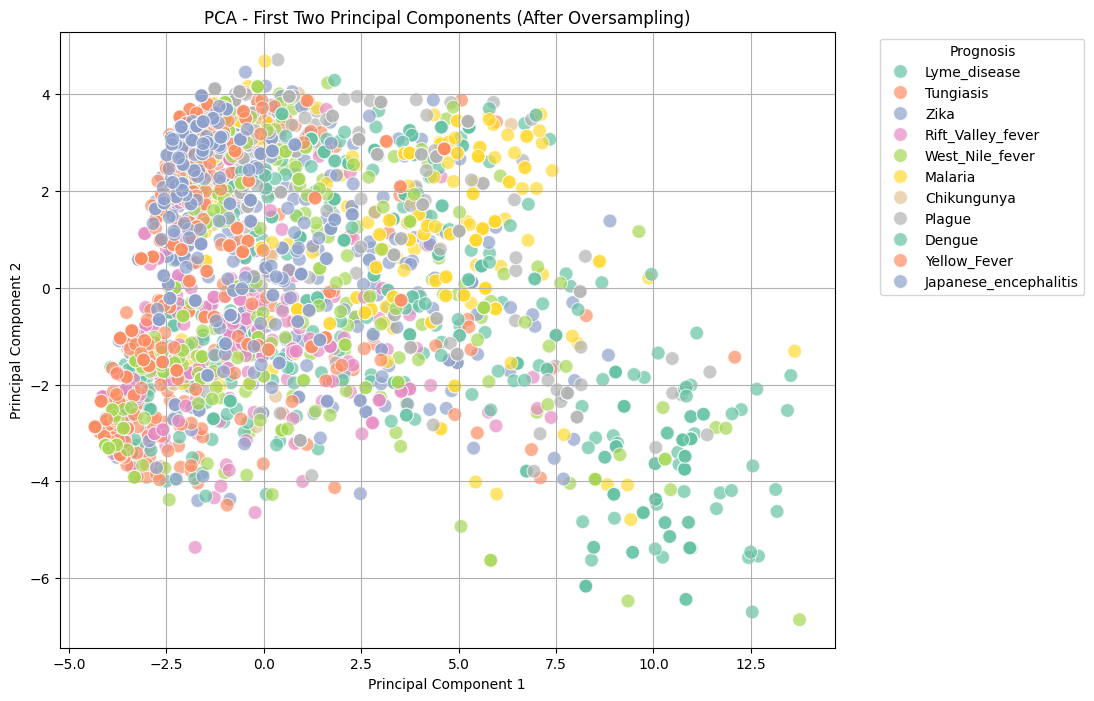

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the data
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Select only numeric columns for PCA
numeric_columns = data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(scaled_data)

# Add the prognosis to the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['prognosis'] = data['prognosis']  # Assuming 'prognosis' is the column with categories

# Plot the PCA result with different colors for each prognosis
plt.figure(figsize=(10, 8))

# Use seaborn to create a scatter plot with hue based on prognosis
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='prognosis', palette='Set2', s=100, alpha=0.7)

# Add title and labels
plt.title('PCA - First Two Principal Components (After Oversampling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Prognosis', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Logistic, Decision Tree, Random Forest and Naive Bayes classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data from a CSV file (adjust the file path as necessary)
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows where the target 'prognosis' is NaN
data_clean = data.dropna(subset=['prognosis'])

# Separate features and target
X = data_clean.drop('prognosis', axis=1)
y = data_clean['prognosis']

# Impute missing values in features (fill with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target variable (prognosis) into numerical form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (adjust n_components based on your dataset)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Initialize models
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train and predict without bootstrapping

# Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Decision Tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Decode predictions to original prognosis names
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_nb_labels = label_encoder.inverse_transform(y_pred_nb)
y_pred_dt_labels = label_encoder.inverse_transform(y_pred_dt)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)
# Evaluate the models

# Naive Bayes
print("\nNaive Bayes Classification Report without Bootstrapping:")
print(classification_report(y_test_labels, y_pred_nb_labels, target_names=label_encoder.classes_, zero_division=0))
nb_acc = accuracy_score(y_test_labels, y_pred_nb_labels)
print(f"Naive Bayes Accuracy without Bootstrapping: {nb_acc}")

# Decision Tree
print("\nDecision Tree Classification Report without Bootstrapping:")
print(classification_report(y_test_labels, y_pred_dt_labels, target_names=label_encoder.classes_, zero_division=0))
dt_acc = accuracy_score(y_test_labels, y_pred_dt_labels)
print(f"Decision Tree Accuracy without Bootstrapping: {dt_acc}")

# Random Forest
print("\nRandom Forest Classification Report without Bootstrapping:")
print(classification_report(y_test_labels, y_pred_rf_labels, target_names=label_encoder.classes_, zero_division=0))
rf_acc = accuracy_score(y_test_labels, y_pred_rf_labels)
print(f"Random Forest Accuracy without Bootstrapping: {rf_acc}")





Naive Bayes Classification Report without Bootstrapping:
                       precision    recall  f1-score   support

          Chikungunya       0.51      0.92      0.66        64
               Dengue       0.29      0.16      0.20        58
Japanese_encephalitis       0.25      0.07      0.11        69
         Lyme_disease       0.45      0.72      0.55        64
              Malaria       0.45      0.48      0.46        52
               Plague       0.32      0.13      0.18        55
    Rift_Valley_fever       0.59      0.30      0.40        67
            Tungiasis       0.46      0.69      0.55        62
      West_Nile_fever       0.33      0.25      0.29        51
         Yellow_Fever       0.37      0.49      0.42        70
                 Zika       0.35      0.38      0.37        55

             accuracy                           0.42       667
            macro avg       0.40      0.42      0.38       667
         weighted avg       0.40      0.42      0.38      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

# Load the data from a CSV file (adjust the file path as necessary)
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows where the target 'prognosis' is NaN
data_clean = data.dropna(subset=['prognosis'])

# Separate features and target
X = data_clean.drop('prognosis', axis=1)
y = data_clean['prognosis']

# Impute missing values in features (fill with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target variable (prognosis) into numerical form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (adjust n_components based on your dataset)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Function to create bootstrapped samples and train model
def bootstrap_model(model, X_train, y_train, X_test, n_iterations=10):
    predictions = np.zeros((len(X_test), n_iterations))  # To store predictions for each iteration

    for i in range(n_iterations):
        # Create bootstrapped dataset (sampling with replacement)
        X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)

        # Train the model on the bootstrapped dataset
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Store predictions
        predictions[:, i] = model.predict(X_test)

    # Majority vote for classification (row-wise)
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)

    return final_predictions

# Initialize models
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Apply bootstrapping on Naive Bayes
y_pred_nb_bootstrap = bootstrap_model(nb, X_train, y_train, X_test)

# Apply bootstrapping on Decision Tree
y_pred_dt_bootstrap = bootstrap_model(dt, X_train, y_train, X_test)

# Apply bootstrapping on Random Forest (even though it already uses bootstrapping)
y_pred_rf_bootstrap = bootstrap_model(rf, X_train, y_train, X_test)

# Decode predictions to original prognosis names
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_nb_bootstrap_labels = label_encoder.inverse_transform(y_pred_nb_bootstrap)
y_pred_dt_bootstrap_labels = label_encoder.inverse_transform(y_pred_dt_bootstrap)
y_pred_rf_bootstrap_labels = label_encoder.inverse_transform(y_pred_rf_bootstrap)

# Evaluate the models

# Naive Bayes
print("\nNaive Bayes Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_nb_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
nb_acc=accuracy_score(y_test_labels, y_pred_nb_bootstrap_labels)
print(f"Naive Bayes Accuracy with Bootstrapping: {nb_acc}")

# Decision Tree
print("\nDecision Tree Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_dt_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
dt_acc=accuracy_score(y_test_labels, y_pred_dt_bootstrap_labels)
print(f"Decision Tree Accuracy with Bootstrapping: {dt_acc}")

# Random Forest
print("\nRandom Forest Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_rf_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
rf_acc=accuracy_score(y_test_labels, y_pred_rf_bootstrap_labels)
print(f"Random Forest Accuracy with Bootstrapping: {rf_acc}")



Naive Bayes Classification Report with Bootstrapping:
                       precision    recall  f1-score   support

          Chikungunya       0.52      0.92      0.66        64
               Dengue       0.32      0.16      0.21        58
Japanese_encephalitis       0.29      0.09      0.13        69
         Lyme_disease       0.44      0.72      0.54        64
              Malaria       0.46      0.52      0.49        52
               Plague       0.44      0.20      0.28        55
    Rift_Valley_fever       0.64      0.31      0.42        67
            Tungiasis       0.47      0.69      0.56        62
      West_Nile_fever       0.28      0.22      0.24        51
         Yellow_Fever       0.35      0.49      0.41        70
                 Zika       0.40      0.40      0.40        55

             accuracy                           0.43       667
            macro avg       0.42      0.43      0.39       667
         weighted avg       0.42      0.43      0.40       66

In [ ]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

lr = LogisticRegression(random_state=42, max_iter=1000)  # Initialize Logistic Regression

# Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

y_pred_lr_labels = label_encoder.inverse_transform(y_pred_lr)

# Logistic Regression with L1 Regularization (Lasso)
lr_l1 = LogisticRegression(random_state=42, max_iter=1000, penalty='l1', solver='liblinear', C=1)

# Apply bootstrapping on Logistic Regression with L1 Regularization
y_pred_lr_l1_bootstrap = bootstrap_model(lr_l1, X_train, y_train, X_test)

# Decode predictions to original prognosis names
y_pred_lr_l1_bootstrap_labels = label_encoder.inverse_transform(y_pred_lr_l1_bootstrap)

# Logistic Regression with L2 Regularization (Ridge)
lr_l2 = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='lbfgs', C=1)

# Apply bootstrapping on Logistic Regression with L2 Regularization
y_pred_lr_l2_bootstrap = bootstrap_model(lr_l2, X_train, y_train, X_test)

# Decode predictions to original prognosis names
y_pred_lr_l2_bootstrap_labels = label_encoder.inverse_transform(y_pred_lr_l2_bootstrap)


# Logistic Regression
print("\nLogistic Regression Classification Report without Bootstrapping:")
print(classification_report(y_test_labels, y_pred_lr_labels, target_names=label_encoder.classes_, zero_division=0))
lr_acc = accuracy_score(y_test_labels, y_pred_lr_labels)
print(f"Logistic Regression Accuracy without Bootstrapping: {lr_acc}")


# Evaluate Logistic Regression with L1 Regularization
print("\nLogistic Regression with L1 Regularization Classification Report:")
print(classification_report(y_test_labels, y_pred_lr_l1_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
lr_l1_acc = accuracy_score(y_test_labels, y_pred_lr_l1_bootstrap_labels)
print(f"Logistic Regression with L1 Regularization Accuracy: {lr_l1_acc}")


# Evaluate Logistic Regression with L2 Regularization
print("\nLogistic Regression with L2 Regularization Classification Report:")
print(classification_report(y_test_labels, y_pred_lr_l2_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
lr_l2_acc = accuracy_score(y_test_labels, y_pred_lr_l2_bootstrap_labels)
print(f"Logistic Regression with L2 Regularization Accuracy: {lr_l2_acc}")
lr_acc=max(lr_acc, lr_l1_acc, lr_l2_acc)


Logistic Regression Classification Report without Bootstrapping:
                       precision    recall  f1-score   support

          Chikungunya       0.61      0.84      0.71        64
               Dengue       0.51      0.52      0.51        58
Japanese_encephalitis       0.36      0.29      0.32        69
         Lyme_disease       0.63      0.69      0.66        64
              Malaria       0.52      0.54      0.53        52
               Plague       0.49      0.42      0.45        55
    Rift_Valley_fever       0.53      0.27      0.36        67
            Tungiasis       0.64      0.76      0.70        62
      West_Nile_fever       0.35      0.35      0.35        51
         Yellow_Fever       0.36      0.34      0.35        70
                 Zika       0.39      0.49      0.44        55

             accuracy                           0.50       667
            macro avg       0.49      0.50      0.49       667
         weighted avg       0.49      0.50      0.

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, classification_report

# Initialize XGBoost classifier without bootstrapping (use all data and features)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,       # Number of trees
    max_depth=5,            # Max depth of trees
    subsample=1.0,          # Use 100% of training data for each tree (no bootstrapping)
    colsample_bytree=1.0,   # Use 100% of features for each tree
    random_state=42
)

# Train the XGBoost model on the full training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Get predicted probabilities for the test set (for log loss calculation)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

# Decode predictions to original prognosis names
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Calculate test accuracy
test_accuracy_xgb = accuracy_score(y_test_labels, y_pred_xgb_labels)

# Encode the target variable for the test set
y_test_encoded = label_encoder.transform(y_test_labels)

# Calculate test loss using the predicted probabilities
test_loss_xgb = log_loss(y_test_encoded, y_pred_proba_xgb)

# Print classification report
print("\nXGBoost Classification Report (Without Bootstrapping):")
print(classification_report(y_test_labels, y_pred_xgb_labels, target_names=label_encoder.classes_, zero_division=0))
print(f"XGBoost Accuracy (Without Bootstrapping): {test_accuracy_xgb}")


XGBoost Classification Report (Without Bootstrapping):
                       precision    recall  f1-score   support

          Chikungunya       0.85      0.86      0.85        64
               Dengue       0.76      0.72      0.74        58
Japanese_encephalitis       0.71      0.68      0.70        69
         Lyme_disease       0.79      0.94      0.86        64
              Malaria       0.85      0.88      0.87        52
               Plague       0.86      0.76      0.81        55
    Rift_Valley_fever       0.75      0.61      0.67        67
            Tungiasis       0.78      0.82      0.80        62
      West_Nile_fever       0.74      0.73      0.73        51
         Yellow_Fever       0.79      0.74      0.76        70
                 Zika       0.71      0.85      0.78        55

             accuracy                           0.78       667
            macro avg       0.78      0.78      0.78       667
         weighted avg       0.78      0.78      0.78       6

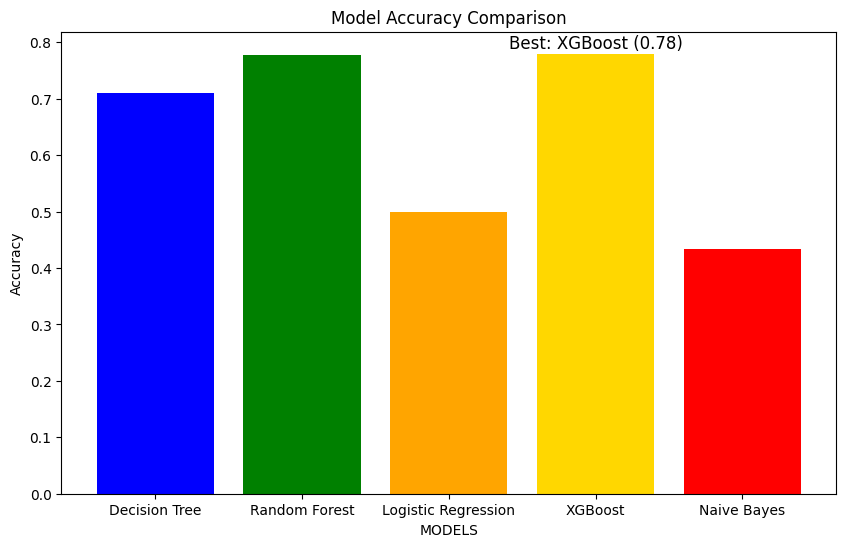

The model with the highest accuracy is XGBoost with an accuracy of 0.78


In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of model names and their respective accuracies
model_accuracies = {
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'Logistic Regression': lr_acc,
    'XGBoost': test_accuracy_xgb,
    'Naive Bayes': nb_acc
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Plotting the accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])

# Highlight the model with the highest accuracy
plt.bar(best_model, best_accuracy, color='gold')

# Add labels and title
plt.xlabel('MODELS')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the highest accuracy model in the title
plt.text(models.index(best_model), best_accuracy + 0.01, f"Best: {best_model} ({best_accuracy:.2f})", ha='center', fontsize=12, color='black')

# Show the plot
plt.show()

# Print the model with the highest accuracy
print(f"The model with the highest accuracy is {best_model} with an accuracy of {best_accuracy:.2f}")


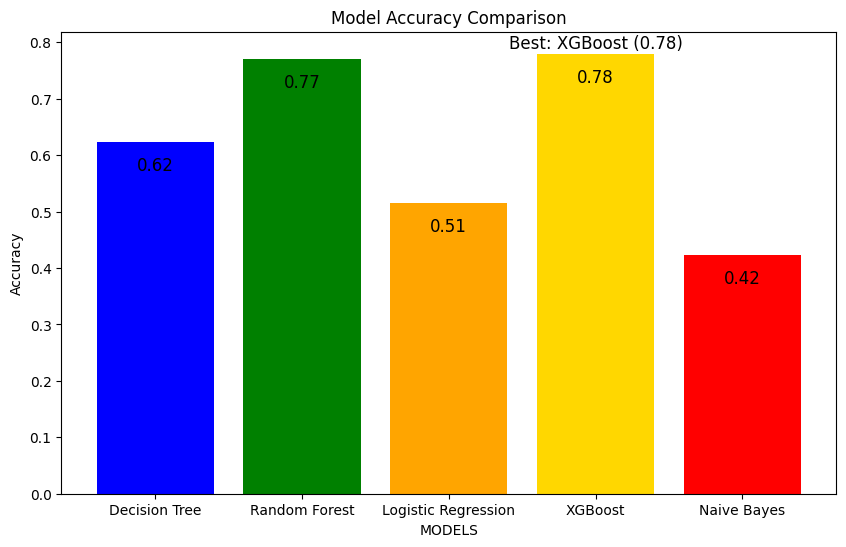

The model with the highest accuracy is XGBoost with an accuracy of 0.78


In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of model names and their respective accuracies
model_accuracies = {
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'Logistic Regression': lr_acc,
    'XGBoost': test_accuracy_xgb,
    'Naive Bayes': nb_acc
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Plotting the accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])

# Highlight the model with the highest accuracy
plt.bar(best_model, best_accuracy, color='gold')

# Add labels and title
plt.xlabel('MODELS')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the highest accuracy model in the title
plt.text(models.index(best_model), best_accuracy + 0.01, f"Best: {best_model} ({best_accuracy:.2f})", ha='center', fontsize=12, color='black')

# Annotate each bar with its respective accuracy
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f"{accuracy:.2f}", ha='center', color='black', fontsize=12)

# Show the plot
plt.show()

# Print the model with the highest accuracy
print(f"The model with the highest accuracy is {best_model} with an accuracy of {best_accuracy:.2f}")



Naive Bayes Classification Report with Bootstrapping:
                       precision    recall  f1-score   support

          Chikungunya       0.52      0.92      0.66        64
               Dengue       0.32      0.16      0.21        58
Japanese_encephalitis       0.29      0.09      0.13        69
         Lyme_disease       0.44      0.72      0.54        64
              Malaria       0.46      0.52      0.49        52
               Plague       0.44      0.20      0.28        55
    Rift_Valley_fever       0.64      0.31      0.42        67
            Tungiasis       0.47      0.69      0.56        62
      West_Nile_fever       0.28      0.22      0.24        51
         Yellow_Fever       0.35      0.49      0.41        70
                 Zika       0.40      0.40      0.40        55

             accuracy                           0.43       667
            macro avg       0.42      0.43      0.39       667
         weighted avg       0.42      0.43      0.40       66

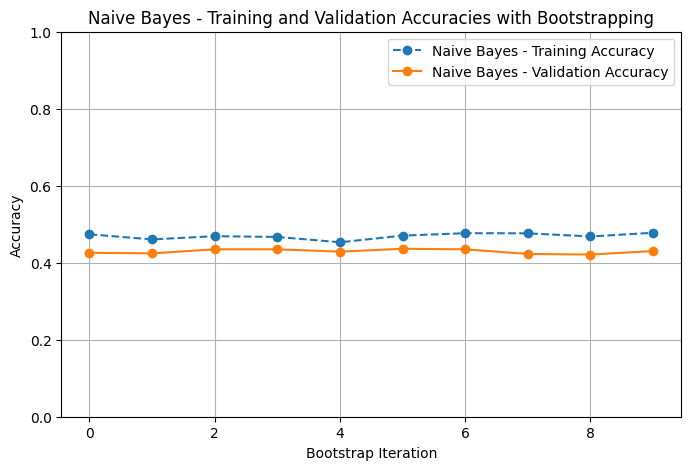

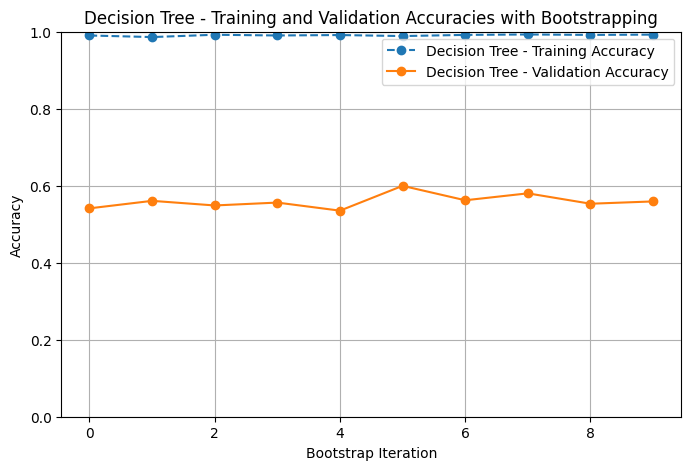

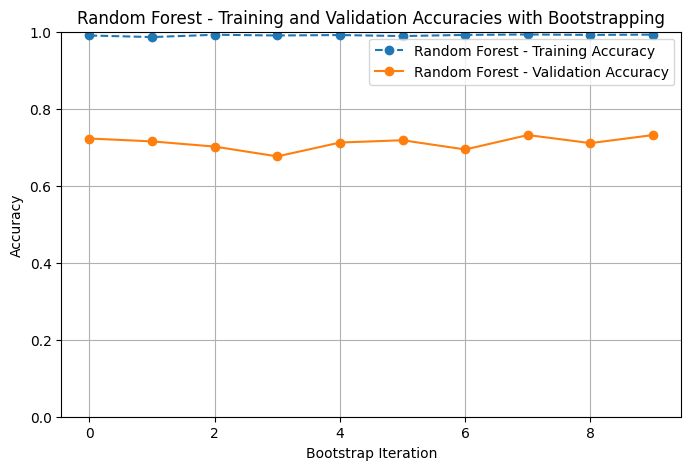

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load the data from a CSV file (adjust the file path as necessary)
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows where the target 'prognosis' is NaN
data_clean = data.dropna(subset=['prognosis'])

# Separate features and target
X = data_clean.drop('prognosis', axis=1)
y = data_clean['prognosis']

# Impute missing values in features (fill with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target variable (prognosis) into numerical form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (adjust n_components based on your dataset)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Function to create bootstrapped samples, train the model, and track accuracy
def bootstrap_model_with_accuracy(model, X_train, y_train, X_test, y_test, n_iterations=10):
    test_predictions = np.zeros((len(X_test), n_iterations))  # To store test predictions for each iteration
    train_accuracies = []  # To store training accuracies for each iteration
    test_accuracies = []   # To store test accuracies for each iteration

    for i in range(n_iterations):
        # Create bootstrapped dataset (sampling with replacement)
        X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)

        # Train the model on the bootstrapped dataset
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Training accuracy
        train_acc = model.score(X_train_bootstrap, y_train_bootstrap)
        train_accuracies.append(train_acc)

        # Test predictions and accuracy
        test_predictions[:, i] = model.predict(X_test)
        test_acc = accuracy_score(y_test, test_predictions[:, i])
        test_accuracies.append(test_acc)

    # Majority vote for classification (row-wise) on test set
    final_test_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=test_predictions)

    return final_test_predictions, train_accuracies, test_accuracies

# Initialize models
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Apply bootstrapping on Naive Bayes
y_pred_nb_bootstrap, nb_train_acc, nb_test_acc = bootstrap_model_with_accuracy(nb, X_train, y_train, X_test, y_test)

# Apply bootstrapping on Decision Tree
y_pred_dt_bootstrap, dt_train_acc, dt_test_acc = bootstrap_model_with_accuracy(dt, X_train, y_train, X_test, y_test)

# Apply bootstrapping on Random Forest
y_pred_rf_bootstrap, rf_train_acc, rf_test_acc = bootstrap_model_with_accuracy(rf, X_train, y_train, X_test, y_test)

# Decode predictions to original prognosis names
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_nb_bootstrap_labels = label_encoder.inverse_transform(y_pred_nb_bootstrap)
y_pred_dt_bootstrap_labels = label_encoder.inverse_transform(y_pred_dt_bootstrap)
y_pred_rf_bootstrap_labels = label_encoder.inverse_transform(y_pred_rf_bootstrap)

# Evaluate the models

# Naive Bayes
print("\nNaive Bayes Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_nb_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
nb_acc = accuracy_score(y_test_labels, y_pred_nb_bootstrap_labels)
print(f"Naive Bayes Accuracy with Bootstrapping: {nb_acc}")

# Decision Tree
print("\nDecision Tree Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_dt_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
dt_acc = accuracy_score(y_test_labels, y_pred_dt_bootstrap_labels)
print(f"Decision Tree Accuracy with Bootstrapping: {dt_acc}")

# Random Forest
print("\nRandom Forest Classification Report with Bootstrapping:")
print(classification_report(y_test_labels, y_pred_rf_bootstrap_labels, target_names=label_encoder.classes_, zero_division=0))
rf_acc = accuracy_score(y_test_labels, y_pred_rf_bootstrap_labels)
print(f"Random Forest Accuracy with Bootstrapping: {rf_acc}")

# Plot individual training and validation accuracy for each model
def plot_model_accuracy(train_acc, test_acc, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(train_acc, label=f'{model_name} - Training Accuracy', linestyle='--', marker='o')
    plt.plot(test_acc, label=f'{model_name} - Validation Accuracy', linestyle='-', marker='o')
    plt.title(f'{model_name} - Training and Validation Accuracies with Bootstrapping')
    plt.xlabel('Bootstrap Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis to range from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Naive Bayes
plot_model_accuracy(nb_train_acc, nb_test_acc, 'Naive Bayes')

# Plot for Decision Tree
plot_model_accuracy(dt_train_acc, dt_test_acc, 'Decision Tree')

# Plot for Random Forest
plot_model_accuracy(rf_train_acc, rf_test_acc, 'Random Forest')



XGBoost Classification Report (Without Bootstrapping):
                       precision    recall  f1-score   support

          Chikungunya       0.85      0.86      0.85        64
               Dengue       0.76      0.72      0.74        58
Japanese_encephalitis       0.71      0.68      0.70        69
         Lyme_disease       0.79      0.94      0.86        64
              Malaria       0.85      0.88      0.87        52
               Plague       0.86      0.76      0.81        55
    Rift_Valley_fever       0.75      0.61      0.67        67
            Tungiasis       0.78      0.82      0.80        62
      West_Nile_fever       0.74      0.73      0.73        51
         Yellow_Fever       0.79      0.74      0.76        70
                 Zika       0.71      0.85      0.78        55

             accuracy                           0.78       667
            macro avg       0.78      0.78      0.78       667
         weighted avg       0.78      0.78      0.78       6

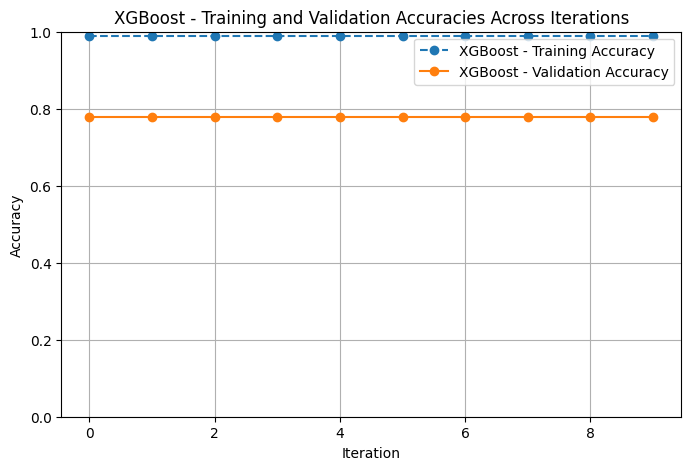

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, classification_report
import matplotlib.pyplot as plt

# Function to train XGBoost and capture accuracy for each iteration
def xgboost_model_with_accuracy(X_train, y_train, X_test, y_test, n_iterations=10):
    train_accuracies = []  # To store training accuracies
    test_accuracies = []   # To store test accuracies

    for i in range(n_iterations):
        # Initialize XGBoost classifier (retrain in each iteration)
        xgb_model = xgb.XGBClassifier(
            n_estimators=100,       # Number of trees
            max_depth=5,            # Max depth of trees
            subsample=1.0,          # Use 100% of training data for each tree (no bootstrapping)
            colsample_bytree=1.0,   # Use 100% of features for each tree
            random_state=42 + i     # Change random_state in each iteration
        )

        # Train the XGBoost model on the full training data
        xgb_model.fit(X_train, y_train)

        # Training accuracy
        train_acc = xgb_model.score(X_train, y_train)
        train_accuracies.append(train_acc)

        # Test accuracy
        y_pred_xgb = xgb_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred_xgb)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

# Capture accuracies over multiple iterations
xgb_train_acc, xgb_test_acc = xgboost_model_with_accuracy(X_train, y_train, X_test, y_test, n_iterations=10)

# Decode predictions to original prognosis names
y_test_labels = label_encoder.inverse_transform(y_test)

# Final predictions for report
xgb_model_final = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)
xgb_model_final.fit(X_train, y_train)
y_pred_xgb_final = xgb_model_final.predict(X_test)
y_pred_xgb_labels_final = label_encoder.inverse_transform(y_pred_xgb_final)

# Calculate test accuracy for the final model
test_accuracy_xgb = accuracy_score(y_test_labels, y_pred_xgb_labels_final)

# Get predicted probabilities for the test set (for log loss calculation)
y_pred_proba_xgb_final = xgb_model_final.predict_proba(X_test)

# Encode the target variable for the test set
y_test_encoded = label_encoder.transform(y_test_labels)

# Calculate test loss using the predicted probabilities
test_loss_xgb = log_loss(y_test_encoded, y_pred_proba_xgb_final)

# Print classification report
print("\nXGBoost Classification Report (Without Bootstrapping):")
print(classification_report(y_test_labels, y_pred_xgb_labels_final, target_names=label_encoder.classes_, zero_division=0))
print(f"XGBoost Accuracy (Without Bootstrapping): {test_accuracy_xgb}")

# Plot individual training and validation accuracy for XGBoost model
def plot_xgboost_accuracy(train_acc, test_acc, model_name='XGBoost'):
    plt.figure(figsize=(8, 5))
    plt.plot(train_acc, label=f'{model_name} - Training Accuracy', linestyle='--', marker='o')
    plt.plot(test_acc, label=f'{model_name} - Validation Accuracy', linestyle='-', marker='o')
    plt.title(f'{model_name} - Training and Validation Accuracies Across Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis to range from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for XGBoost
plot_xgboost_accuracy(xgb_train_acc, xgb_test_acc, 'XGBoost')



Random Forest Classification Report:
                       precision    recall  f1-score   support

          Chikungunya       0.75      0.78      0.76        64
               Dengue       0.63      0.71      0.67        58
Japanese_encephalitis       0.67      0.70      0.68        69
         Lyme_disease       0.79      0.89      0.84        64
              Malaria       0.75      0.88      0.81        52
               Plague       0.72      0.71      0.72        55
    Rift_Valley_fever       0.82      0.54      0.65        67
            Tungiasis       0.78      0.81      0.79        62
      West_Nile_fever       0.74      0.61      0.67        51
         Yellow_Fever       0.78      0.66      0.71        70
                 Zika       0.66      0.80      0.72        55

             accuracy                           0.73       667
            macro avg       0.74      0.73      0.73       667
         weighted avg       0.74      0.73      0.73       667


XGBoost Class

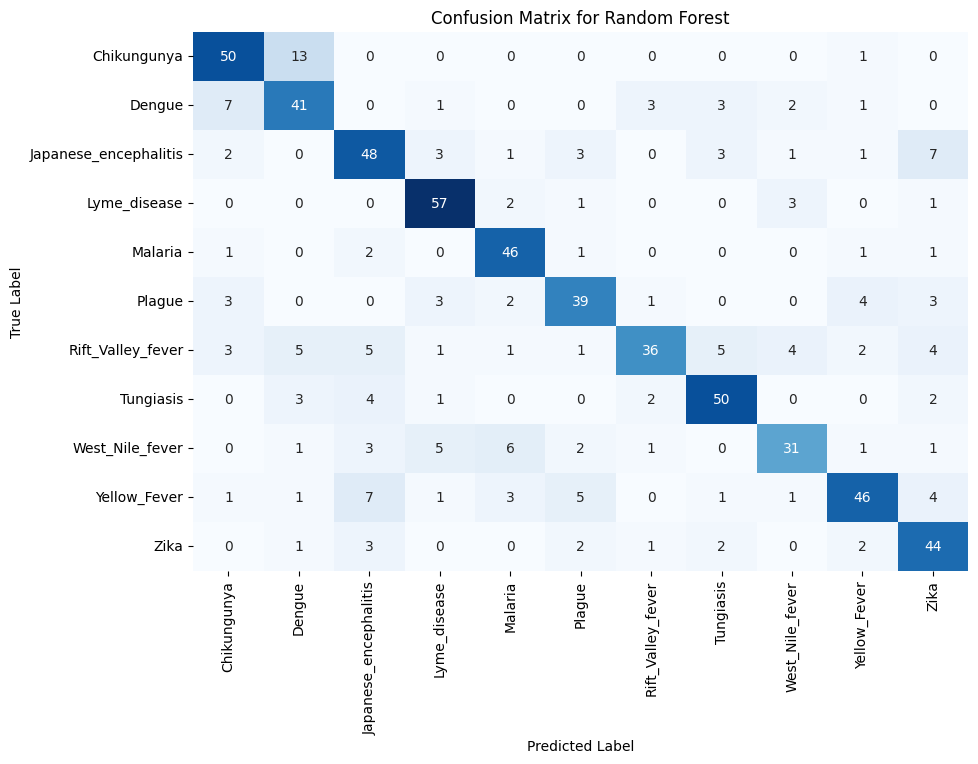

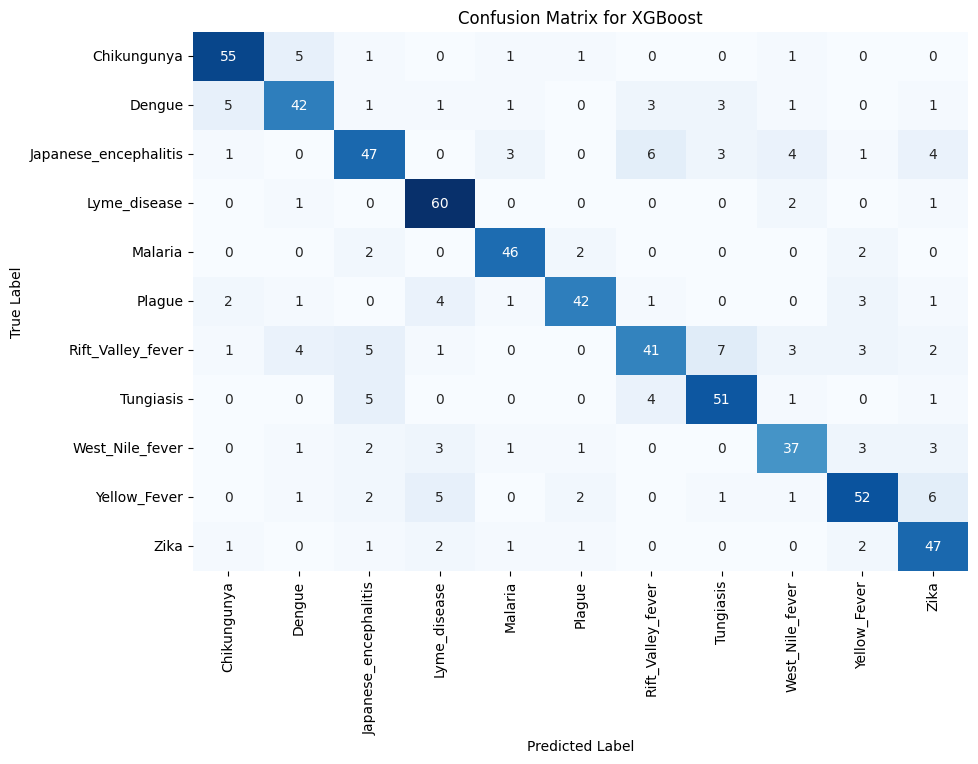

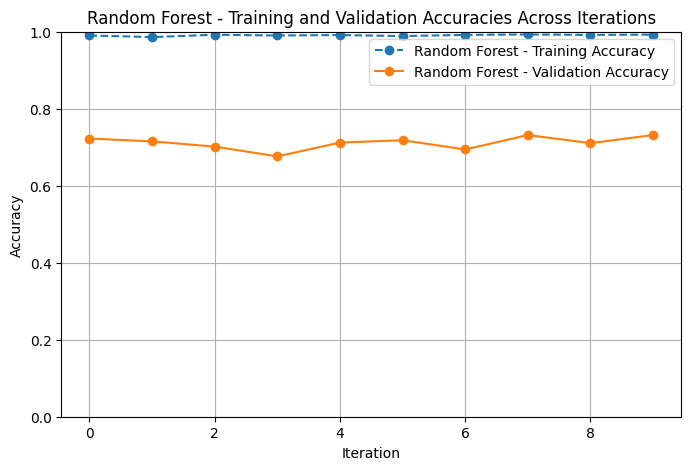

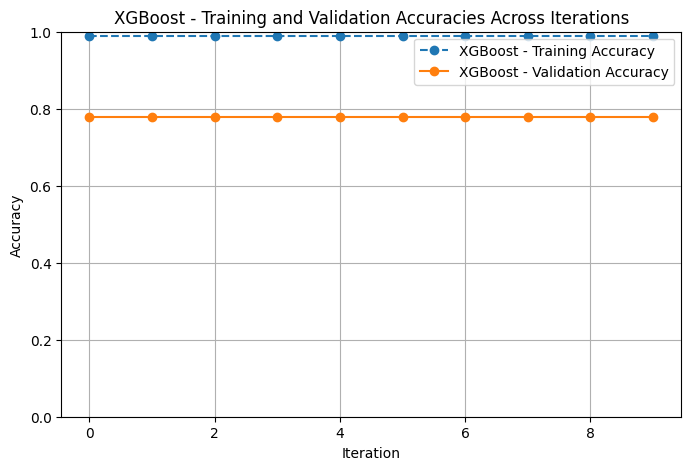

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file (adjust the file path as necessary)
file_path = '/content/DiseaseData_Resampled.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop rows where the target 'prognosis' is NaN
data_clean = data.dropna(subset=['prognosis'])

# Separate features and target
X = data_clean.drop('prognosis', axis=1)
y = data_clean['prognosis']

# Impute missing values in features (fill with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target variable (prognosis) into numerical form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (adjust n_components based on your dataset)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Function to create bootstrapped samples and train model
def bootstrap_model_with_accuracy(model, X_train, y_train, X_test, y_test, n_iterations=10):
    train_accuracies = []  # To store training accuracies
    test_accuracies = []   # To store test accuracies

    for i in range(n_iterations):
        # Create bootstrapped dataset (sampling with replacement)
        X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)

        # Train the model on the bootstrapped dataset
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Training accuracy
        train_acc = model.score(X_train_bootstrap, y_train_bootstrap)
        train_accuracies.append(train_acc)

        # Test accuracy
        y_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

# Initialize and evaluate models
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_train_acc, rf_test_acc = bootstrap_model_with_accuracy(rf, X_train, y_train, X_test, y_test)

# XGBoost
def xgboost_model_with_accuracy(X_train, y_train, X_test, y_test, n_iterations=10):
    train_accuracies = []  # To store training accuracies
    test_accuracies = []   # To store test accuracies

    for i in range(n_iterations):
        # Initialize XGBoost classifier (retrain in each iteration)
        xgb_model = xgb.XGBClassifier(
            n_estimators=100,
            max_depth=5,
            subsample=1.0,
            colsample_bytree=1.0,
            random_state=42 + i
        )

        # Train the model on the full training data
        xgb_model.fit(X_train, y_train)

        # Training accuracy
        train_acc = xgb_model.score(X_train, y_train)
        train_accuracies.append(train_acc)

        # Test accuracy
        y_pred = xgb_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

xgb_train_acc, xgb_test_acc = xgboost_model_with_accuracy(X_train, y_train, X_test, y_test, n_iterations=10)

# Decode predictions to original prognosis names for confusion matrix
y_test_labels = label_encoder.inverse_transform(y_test)

# Predictions for Random Forest
y_pred_rf = rf.predict(X_test)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)

# Predictions for XGBoost
xgb_model_final = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)
xgb_model_final.fit(X_train, y_train)
y_pred_xgb = xgb_model_final.predict(X_test)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Print classification reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_labels, y_pred_rf_labels, target_names=label_encoder.classes_, zero_division=0))

print("\nXGBoost Classification Report:")
print(classification_report(y_test_labels, y_pred_xgb_labels, target_names=label_encoder.classes_, zero_division=0))

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Confusion matrix for Random Forest
plot_confusion_matrix(y_test_labels, y_pred_rf_labels, label_encoder.classes_, 'Random Forest')

# Confusion matrix for XGBoost
plot_confusion_matrix(y_test_labels, y_pred_xgb_labels, label_encoder.classes_, 'XGBoost')

# Plot individual training and validation accuracy for each model
def plot_model_accuracy(train_acc, test_acc, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(train_acc, label=f'{model_name} - Training Accuracy', linestyle='--', marker='o')
    plt.plot(test_acc, label=f'{model_name} - Validation Accuracy', linestyle='-', marker='o')
    plt.title(f'{model_name} - Training and Validation Accuracies Across Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis to range from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Random Forest
plot_model_accuracy(rf_train_acc, rf_test_acc, 'Random Forest')

# Plot for XGBoost
plot_model_accuracy(xgb_train_acc, xgb_test_acc, 'XGBoost')
